<a href="https://colab.research.google.com/github/HWP-Wilson/Teste_estatistico_na_obesidade_infantil/blob/main/Helano_Wilson_Projeto3_bootcampAlura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='blue'>Obesidade infanto-juvenil nas escolas 
helanowilson@ufc.br

Helano Wilson
##Sumário
1.	Introdução
2.	Importação de bibliotecas
3.	Dataset (exploração e análise das variáveis)
4.	Dataset (Exploração estatística sobre obesidade)
5.	Hipótese analisada atráves de teste estatístico 
7.	Conclusão




## 1. Introdução
Em 2009, o Ministério da Saúde, em parceria com o Ministério da Educação, realizou a primeira edição do PeNSE - Pesquisa Nacional de Saúde do Escolar. Nessa edição, os escolares do 9o ano do ensino fundamental (antiga 8a série) das escolas públicas e privadas dos Municípios das Capitais constituíram sua população-alvo. Em 2012, manteve-se o público-alvo, no entanto foram acrescentados dados do ambiente escolar e entorno. Já na edição de 2015, a pesquisa ampliou o público investigado: de 11 anos até os 18 anos. Importante destacar que a justificativa para o público das edições de 2009 e 2012 ser alunos do 9º ano é ter capacidade de responder o questionário autoaplicável. Analisar, explorar, buscar respostas com os dados do PeNSE – 2015 (alunos) é objetivo desse projeto. 
O projeto pretende focar na relação Atividade física x Obesidade infanto-juvenil, sendo dividido em três momentos.

•	No primeiro momento será explorado dados relativos ao Dataset disponibilizado no site do IBGE, como tamanho do arquivo, colunas disponíveis, interpretação e entendimento de variáveis e processamento das informações úteis para o projeto.

•	No segundo momento o trabalho foca em exploração estatística dos dados. Onde estão os obesos? Como está dividido as condições nutricionais nas regiões? A obesidade é heterogênea nas idades pesquisadas? Existe diferença nesse quesito em relação ao sexo? Escolas particulares ou públicas possuem maior proporção de obesos? 

•	No terceiro momento levanta-se a hipótese (analisado com teste estatístico) que alunos que não praticam atividade física são mais propensos a serem obesos que alunos que praticam atividade física. 


## 2. Importação de bibliotecas 
Essas são as bibliotecas que serão usadas no projeto: Numpy; Pandas; Matplotlib; Seaborn e Scipy. 


In [ ]:
#Importando bibliotecas; baixando arquivos e tratando os dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
plt.style.use('ggplot')
from scipy.stats import norm



%matplotlib inline

In [ ]:
# Montando o Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##3. Dataset (Análise exploratória sobre o Dataset)

### 3.1 Importação do arquivo Pense2015 (base para esse projeto)

In [ ]:
###Importação do Dataset utilizado como base 
dados =  pd.read_csv('/content/drive/MyDrive/Helano_Wilson_Projeto3_bootcampAlura/PENSE_AMOSTRA2_ALUNO.CSV', sep = ";", thousands = ".", decimal = ",")


In [ ]:
###Visualização do Dataset (as 5 primeiras linhas)
dados.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB11005,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,2,7,3,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,5,1,8,3,4,3,6,6,1,6,1,-1,2,...,2,1,2,1,1,4,2,-1,3,1,1,-1,1,1,2,2,1,2,2,2,2,2,2,2,371.0,1570.0,37.1,157.0,2,1,1223,1,299.735235,1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,5,3,8,2,1,8,8,6,1,1,5,-1,2,...,2,3,2,4,4,4,1,2,3,3,1,-1,1,1,2,2,2,2,2,1,2,2,2,2,502.0,1520.0,50.2,152.0,2,2,1223,1,355.170081,1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,1,5,5,2,-1,2,1,1,1,1,2,3,1,4,1,2,2,5,3,2,3,1,8,2,8,1,1,5,5,1,...,2,1,2,1,2,3,1,2,1,2,5,99,1,-1,2,2,1,1,1,1,1,1,1,1,482.0,1614.0,48.2,161.4,2,2,1223,1,299.735235,1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,1,7,4,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,6,3,2,4,1,3,2,7,1,5,1,-1,2,...,2,1,2,2,2,4,1,10,3,1,2,-1,1,-1,2,2,1,2,2,2,1,2,2,2,694.0,1725.0,69.4,172.5,2,3,1223,1,355.170081,1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,2,1,4,2,2,4,1,3,2,2,2,13,1,-1,1,2,1,1,1,1,1,1,1,1,789.0,1675.0,78.9,167.5,2,4,1223,1,299.735235,1,2,4,1,5,1,296


In [ ]:
### Qual o tamanho do arquivo? Quantos alunos participaram da pesquisa? Quantas colunas existem no DataSet?

# Tamanho do dataset
dados.shape

print('O dataset possui {} linhas (alunos) e {} colunas'.format(dados.shape[0], dados.shape[1]))


O dataset possui 16556 linhas (alunos) e 181 colunas


In [ ]:
### Quais as variáveis (e seus códigos) utilizados no questionário? Quais variáveis serão importantes para esse projeto sobre Obesidade?
# Verificando as colunas existentes
dados.columns.values

array(['ANOPESQ', 'PAIS', 'REGEOGR', 'VB00004', 'VB01001', 'VB01002',
       'VB01003', 'VB01004', 'VB01005', 'VB01006', 'VB01007', 'VB01008A',
       'VB01010A', 'VB01011', 'VB01012', 'VB01013', 'VB01014', 'VB01015A',
       'VB01016', 'VB01017', 'VB01018', 'VB01019', 'VB01020A', 'VB01021',
       'VB01022', 'VB01023', 'VB01024', 'VB01025', 'VB01026', 'VB02001',
       'VB02002', 'VB02004A', 'VB02010', 'VB02011', 'VB02013', 'VB02017A',
       'VB02018A', 'VB02019A', 'VB02020A', 'VB02021', 'VB02022',
       'VB02023', 'VB02024', 'VB02025', 'VB02026', 'VB02027', 'VB03001A1',
       'VB03001A2', 'VB03002A1', 'VB03002A2', 'VB03003A', 'VB03005A',
       'VB03006A', 'VB03007', 'VB03008', 'VB03009A', 'VB03010A',
       'VB03011A', 'TEMPODESLOC', 'TEMPOTOTAL', 'TEMPOEDFIS',
       'TEMPOEXTRA', 'TEMPOEST', 'VB04001', 'VB04002', 'VB04003',
       'VB04005', 'VB04006A', 'VB04008A', 'VB04009', 'VB04010', 'VB04011',
       'VB05002', 'VB05003', 'VB05004', 'VB05005', 'VB05006A', 'VB05007',
       

 

###3.2 Variáveis utilizadas
Vou selecionar as variáveis importantes para a análise. Como os microdados apresentam 181 variáveis, vou me concentrar em apenas algumas delas.

REGEOGR: Região do País

•	1: Norte

•	2: Nordeste

•	3: Sudeste

•	4: Sul

•	5: Centro-Oeste

VB01001: Sexo

•	1: Masculino

•	2: Feminino

VB01002: Raça

•	1: Branca

•	2: Preta

•	3: Amarela

•	4: Parda

•	5: Indígena

VB01003: Idade

•	11: 11 anos ou menos

•	12: 12 anos

•	13: 13 anos

•	14: 14 anos

•	15: 15 anos

•	16: 16 anos 

•	17: 17 anos

•	18: 18 anos

•	19: 19 anos ou mais

VB17006: Estado Nutricional

•	1: Deficit de peso

•	2: Eutrofia

•	3: Sobrepeso

•	4: Obesidade

VB0007: Classe administrativa da Escola

•	1: Pública

•	2: Particular

In [ ]:
### Criação de dicionários para melhor apresentação e análise gráfica.
Raça = {1: 'Branca', 2: 'Preta', 3: 'Amarela', 4: 'Parda', 5: 'Indigena', 99: 'Não Informado'}
dados['Raça']= dados['VB01002'].map(Raça)
Nutricional = {1: 'Déficit de peso', 2: 'Eutrofia', 3: 'Sobrepeso', 4: 'Obesidade'}
dados['Nutricional']= dados['VB17006'].map(Nutricional)
Região = {1: 'Norte', 2: 'Nordeste', 3: 'Sudeste', 4: 'Sul', 5: 'Centro-Oeste'}
dados['Região']= dados['REGEOGR'].map(Região)
Sexo = {1: 'Masculino', 2: 'Feminino'}
dados['Sexo']= dados['VB01001'].map(Sexo)
Admistração = {1: 'Pública', 2: 'Particular'}
dados['Administração']= dados['V0007'].map(Admistração)
dados.head()


,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma,Raça,Nutricional,Região,Sexo,Administração
0,2015,76,1,1,2,1,13,7,7,1,2,7,3,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,5,1,8,3,4,3,6,6,1,6,1,-1,2,...,4,2,-1,3,1,1,-1,1,1,2,2,1,2,2,2,2,2,2,2,371.0,1570.0,37.1,157.0,2,1,1223,1,299.735235,1,2,4,1,1,1,296,Branca,Déficit de peso,Norte,Feminino,Particular
1,2015,76,1,1,2,1,14,4,7,1,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,5,3,8,2,1,8,8,6,1,1,5,-1,2,...,4,1,2,3,3,1,-1,1,1,2,2,2,2,2,1,2,2,2,2,502.0,1520.0,50.2,152.0,2,2,1223,1,355.170081,1,2,4,1,2,1,296,Branca,Eutrofia,Norte,Feminino,Particular
2,2015,76,1,1,1,4,13,6,7,1,1,5,5,2,-1,2,1,1,1,1,2,3,1,4,1,2,2,5,3,2,3,1,8,2,8,1,1,5,5,1,...,3,1,2,1,2,5,99,1,-1,2,2,1,1,1,1,1,1,1,1,482.0,1614.0,48.2,161.4,2,2,1223,1,299.735235,1,2,4,1,3,1,296,Parda,Eutrofia,Norte,Masculino,Particular
3,2015,76,1,1,1,1,14,6,7,1,1,7,4,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,6,3,2,4,1,3,2,7,1,5,1,-1,2,...,4,1,10,3,1,2,-1,1,-1,2,2,1,2,2,2,1,2,2,2,694.0,1725.0,69.4,172.5,2,3,1223,1,355.170081,1,2,4,1,4,1,296,Branca,Sobrepeso,Norte,Masculino,Particular
4,2015,76,1,1,1,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,4,1,3,2,2,2,13,1,-1,1,2,1,1,1,1,1,1,1,1,789.0,1675.0,78.9,167.5,2,4,1223,1,299.735235,1,2,4,1,5,1,296,Branca,Obesidade,Norte,Masculino,Particular


##4. Dataset (Análise estatística sobre a pesquisa (Pense2015) e sobre Obesidade)

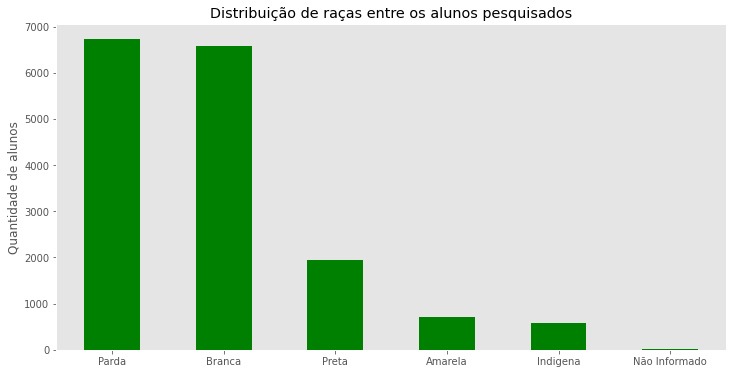

In [ ]:
### Como estão distribuidos, por raças, os 16556 alunos participantes da pesquisa?

dados['Raça'].value_counts().plot(kind='bar', figsize=(12,6), grid = False, rot=0, color ='green')
plt.title('Distribuição de raças entre os alunos pesquisados')
plt.xlabel('')
plt.ylabel('Quantidade de alunos')
plt.show()

In [ ]:
### Distribuição por raças dos alunos participantes da pesquisa em porcentagem.

### Verifica-se compatibilidade com a distribuição por raças na população brasileiras segundo o IBGE. 
dados['Raça'].value_counts(normalize=True)*100

Parda            40.625755
Branca           39.713699
Preta            11.711766
Amarela           4.300556
Indigena          3.509302
Não Informado     0.138922
Name: Raça, dtype: float64

40,6% dos entrevistados se declararam Pardos; 

39,7% dos entrevistados são brancos;

11,7% dos alunos são pretos;

4,3% se consideram amarelos e apenas 3,5% são indigenas. 

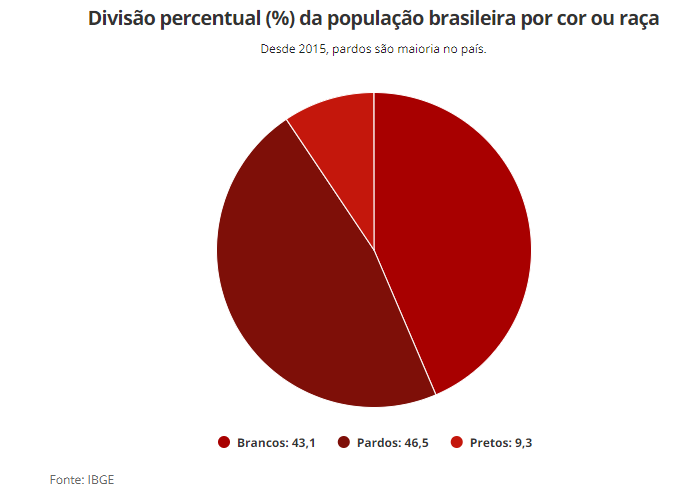

Dos 16556 alunos participantes da pesquisa, 1514 são classificados como Obesos (VB17006), segundo questionário levando em conta dados de peso e altura. O que representa pouco mais de 9% dos entrevistados. A maioria dos entrevistados está dentro do peso (eutrofia): 69,3%. Outros 18,29% estão em sobrepeso e 3,23% está com déficit de peso. 

In [ ]:
### Valores em porcentagem do gráfico acima. 
dados['Nutricional'].value_counts(normalize=True)*100

Eutrofia           69.334380
Sobrepeso          18.289442
Obesidade           9.144721
Déficit de peso     3.231457
Name: Nutricional, dtype: float64

In [ ]:
### Como estão distribuidos, por raças, os 1514 alunos (obesos) participantes da pesquisa?
dados_obeso = dados.query('VB17006 == "4" & VB03006A < 9')
dados_obeso

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma,Raça,Nutricional,Região,Sexo,Administração
4,2015,76,1,1,1,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,4,1,3,2,2,2,13,1,-1,1,2,1,1,1,1,1,1,1,1,789.0,1675.0,78.9,167.5,2,4,1223,1,299.735235,1,2,4,1,5,1,296,Branca,Obesidade,Norte,Masculino,Particular
5,2015,76,1,1,2,4,14,12,6,1,1,7,3,2,-1,1,1,1,1,1,2,4,1,4,1,2,2,5,3,7,7,8,3,8,1,5,6,1,4,1,...,4,1,2,2,1,1,1,1,2,1,2,2,2,1,2,2,2,1,2,729.0,1605.0,72.9,160.5,2,4,1223,1,355.170081,1,2,4,1,6,1,296,Parda,Obesidade,Norte,Feminino,Particular
8,2015,76,1,1,1,4,13,8,7,1,1,7,5,2,-1,2,1,1,1,1,2,3,2,4,1,2,2,5,3,2,1,5,3,6,2,1,4,1,-1,2,...,4,1,1,1,3,2,7,1,-1,2,2,1,2,2,2,2,2,2,2,783.0,1700.0,78.3,170.0,2,4,1223,1,299.735235,1,2,4,1,9,1,296,Parda,Obesidade,Norte,Masculino,Particular
14,2015,76,1,1,1,4,14,10,6,1,2,7,2,2,-1,2,1,1,1,1,2,2,2,4,1,2,2,5,3,3,2,1,8,1,8,1,1,6,-1,2,...,4,1,2,1,1,2,13,1,-1,2,2,2,2,2,2,1,2,2,2,855.0,1773.0,85.5,177.3,2,4,1223,1,355.170081,1,2,4,1,15,1,296,Parda,Obesidade,Norte,Masculino,Particular
15,2015,76,1,1,2,4,14,9,6,1,1,7,5,2,-1,1,1,1,1,1,2,5,1,4,1,1,2,5,1,1,2,6,3,4,4,1,2,3,-1,2,...,4,1,2,1,2,2,1,1,1,2,2,2,2,2,2,2,2,1,2,944.0,1654.0,94.4,165.4,2,4,1223,1,355.170081,1,2,4,1,16,1,296,Parda,Obesidade,Norte,Feminino,Particular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16503,2015,76,5,1,2,1,16,10,4,1,2,7,3,2,-1,2,1,1,1,1,1,3,2,6,1,2,2,5,3,7,1,7,4,8,1,5,6,1,-1,2,...,3,2,-1,3,2,2,-1,1,2,2,2,2,2,2,2,1,2,2,2,932.0,1595.0,93.2,159.5,2,4,5223,5,341.360173,1,2,4,1,16504,369,340,Branca,Obesidade,Centro-Oeste,Feminino,Particular
16525,2015,76,5,1,1,1,12,4,9,1,2,2,4,2,-1,2,2,1,1,1,2,5,2,2,1,2,2,3,3,1,1,1,1,7,2,1,2,1,1,1,...,3,1,7,2,3,5,13,1,-1,1,1,2,1,2,2,2,1,2,1,558.0,1512.0,55.8,151.2,2,4,5121,5,323.598680,1,1,2,-1,16526,370,442,Branca,Obesidade,Centro-Oeste,Masculino,Pública
16533,2015,76,5,1,2,4,13,7,7,1,1,5,3,2,-1,2,1,1,1,1,1,2,2,2,1,2,2,5,3,7,7,7,8,5,8,1,1,6,4,1,...,1,2,-1,2,4,3,13,1,1,1,2,2,2,2,2,1,2,2,2,851.0,1618.0,85.1,161.8,2,4,5121,5,289.864054,1,1,2,-1,16534,370,442,Parda,Obesidade,Centro-Oeste,Feminino,Pública
16536,2015,76,5,1,2,3,14,9,6,1,2,2,4,1,1,2,1,2,2,2,1,2,2,2,1,2,2,5,3,8,2,6,5,8,4,1,6,1,4,1,...,4,1,1,2,3,2,5,1,1,1,2,2,2,2,1,2,2,2,2,731.0,1555.0,73.1,155.5,2,4,5121,5,319.915182,1,1,2,-1,16537,370,442,Amarela,Obesidade,Centro-Oeste,Feminino,Pública


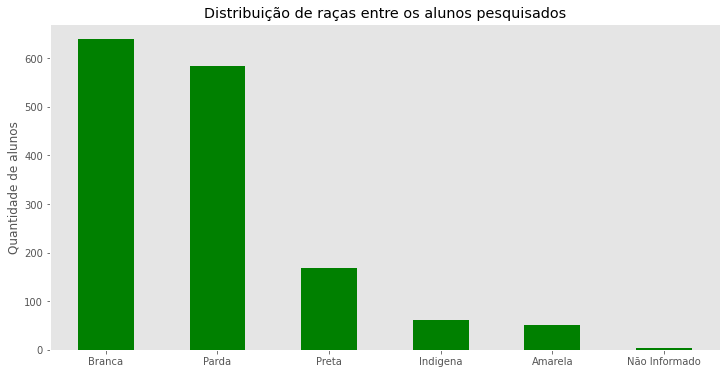

In [ ]:
### Gráfico mostrando distribuição por raças dos alunos considerados obesos.
dados_obeso['Raça'].value_counts().plot(kind='bar', figsize=(12,6), grid = False, rot=0, color ='green')
plt.title('Distribuição de raças entre os alunos pesquisados')
plt.xlabel('')
plt.ylabel('Quantidade de alunos')
plt.show()

In [ ]:
### Valores em porcentagem do gráfico acima. 
dados_obeso['Raça'].value_counts(normalize=True)*100

Branca           42.402123
Parda            38.752488
Preta            11.147976
Indigena          4.114134
Amarela           3.384207
Não Informado     0.199071
Name: Raça, dtype: float64

Verifica-se distribuição similar entre o total de alunos pesquisados e somente os obesos em relação as raças... 

...no entanto, quando se analisa em que região está mais localizado os obesos, constata-se que a região Sul  possui o maior número de obesos mesmo sendo a 4ª região em relação ao número de alunos entrevistados. 

Text(0, 0.5, 'Quantidade de alunos/obesos')

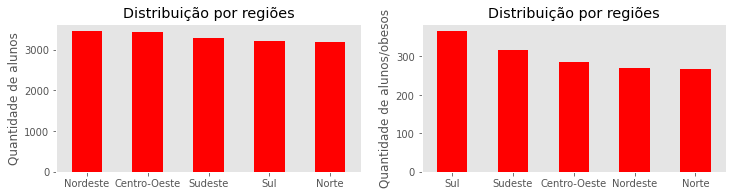

In [ ]:
###Plotagem dos 2 gráficos

ax = plt.figure(figsize=(18, 10))
s1 = plt.subplot(2, 2, 1)
#Gastos Total do governo federal
s1 = dados['Região'].value_counts().plot(kind='bar', figsize=(12,6), grid = False, rot=0, color ='red')
plt.title('Distribuição por regiões')
plt.xlabel('')
plt.ylabel('Quantidade de alunos')



#Internações no Brasil

s2 = plt.subplot(2, 2, 2)
s2 = dados_obeso['Região'].value_counts().plot(kind='bar', figsize=(12,6), grid = False, rot=0, color ='red')
plt.title('Distribuição por regiões')
plt.xlabel('')
plt.ylabel('Quantidade de alunos/obesos')




Os entrevistados, em relação ao gênero, estão distribuidos quase que igualitariamente: 50% para cada sexo. No entanto...



In [ ]:
### Pode-se considerar 50% para cada gênero os alunos entrevistados. 
dados['Sexo'].value_counts(normalize=True)*100

Masculino    50.054361
Feminino     49.945639
Name: Sexo, dtype: float64

...os obesos, em maior proporção, são as crianças do sexo masculino: 56% dentre os obesos. 

In [ ]:
dados_obeso['Sexo'].value_counts(normalize=True)*100

Masculino    56.071666
Feminino     43.928334
Name: Sexo, dtype: float64

Em geral, os alunos mais novos (entre 11 e 16 anos) são maioria na pesquisa. Compreendem um universo de 85% dos entrevistados. 

In [ ]:
### Proporção de alunos por idade
dados['VB01003'].value_counts(normalize=True)*100

12    15.909640
13    15.468712
15    14.647258
16    13.711041
14    12.883547
11    12.515100
17     9.283643
18     3.400580
19     2.180478
Name: VB01003, dtype: float64

As crianças de 11 anos ou menos são 12,5% dos entrevistados. Porém, ao analisar somente os obesos, verifica-se que essas faixa etária compreende 18,36% dos obesos. Ao juntar com os alunos de 12 e 13 anos, resulta em mais de metade dos obesos nessas três faixas etárias. Dado que levanta preocupação. 
52% dos obesos são de 13 anos ou menos. 

In [ ]:
### Proporção de obesos por idade.
dados_obeso['VB01003'].value_counts(normalize=True)*100

12    18.579960
11    18.314532
13    15.461181
14    12.342402
15    12.076974
16     9.754479
17     7.896483
18     2.986065
19     2.587923
Name: VB01003, dtype: float64

Somente na raça Indigena o número de obesos do sexo feminino sobrepõe aos obesos do sexo masculino. 


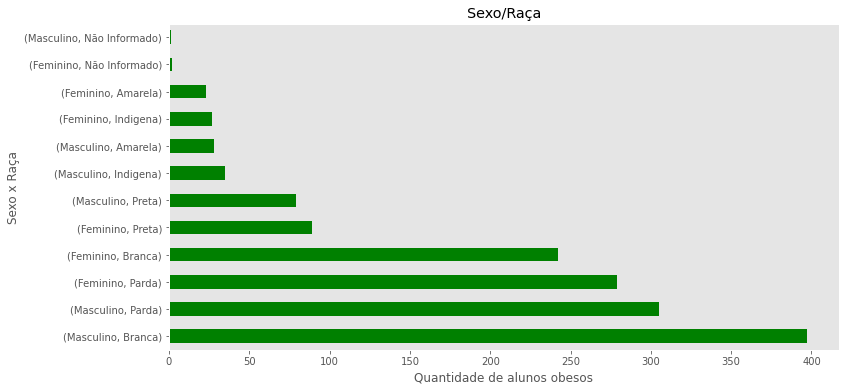

In [ ]:
### Relação entre sexo e raça e quantidade de alunos, obesos, na pesquisa. 
dados_obeso[['Sexo','Raça']].value_counts().plot(kind='barh', figsize=(12,6), grid = False, rot=0, color ='green')
plt.title('Sexo/Raça')
plt.xlabel('Quantidade de alunos obesos')
plt.ylabel('Sexo x Raça')
plt.show()

Em relação as escolas públicas e particulares, 70% dos alunos obesos estudam em escolas públicas. 




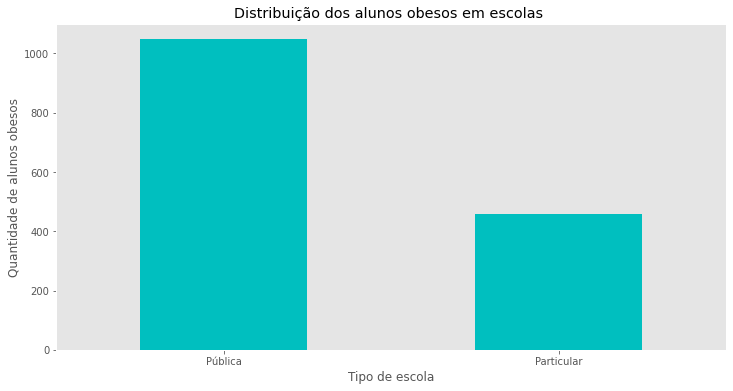

In [ ]:
dados_obeso['Administração'].value_counts().plot(kind='bar', figsize=(12,6), grid = False, rot=0, color ='c')
plt.title('Distribuição dos alunos obesos em escolas ')
plt.xlabel('Tipo de escola')
plt.ylabel('Quantidade de alunos obesos')
plt.show()

In [ ]:
### Proporção de obesos entre escolas públicas e particulares.
dados_obeso['Administração'].value_counts(normalize=True)*100

Pública       69.542137
Particular    30.457863
Name: Administração, dtype: float64

A variável VB03006A (aborda sobre a quantidade de dias de atividade fisica, fora a Educação Fisica na escola), onde 1 é não praticou atividade, 2 é 1 dia, 3 são 2 dias, 4 são 3 dias, 5 são 4 dias, 6 são 5 dias, 7 são 5 dias mais o sábado, e 8 são 5 dias mais sábado e domingo.

Analisando o comportamento dos alunos obesos e dos alunos saudáveis em relação a essa variável, constata-se que o comportamento dos dois grupos, obesos e saudáveis, é bastante similar. Em ambos, proximo de 30% dos alunos não praticam nenhuma atividade física na semana. As outras opções de resposta no questionário também possuem resultados semelhantes. 


In [ ]:
### Atividade fisica semanal de alunos obesos. 
dados_obeso['VB03006A'].value_counts(normalize=True)*100

1    31.320504
4    12.342402
8    12.276045
2    11.944260
3    11.877903
6     8.228268
5     6.569343
7     5.441274
Name: VB03006A, dtype: float64

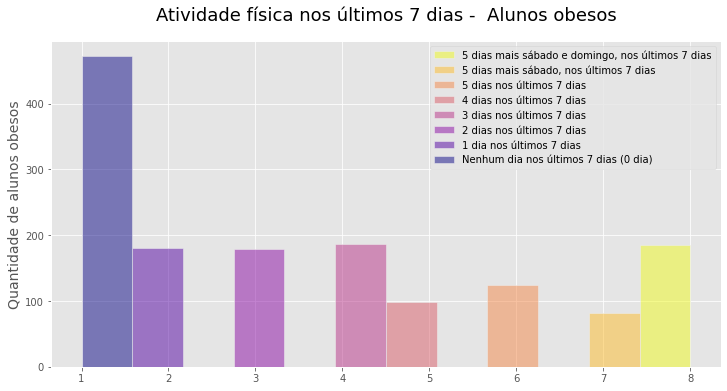

In [ ]:
### Exploração gráfica sobre a variável atividade física na semana.
variável = ('Nenhum dia nos últimos 7 dias (0 dia)', '1 dia nos últimos 7 dias','2 dias nos últimos 7 dias','3 dias nos últimos 7 dias','4 dias nos últimos 7 dias','5 dias nos últimos 7 dias','5 dias mais sábado, nos últimos 7 dias','5 dias mais sábado e domingo, nos últimos 7 dias')

plt.figure(figsize=(12,6))
plt.title("Atividade física nos últimos 7 dias -  Alunos obesos", fontsize= 18, pad=20)
ax = sns.histplot(data = dados_obeso,
                  x = 'VB03006A',
                  hue='VB03006A',
                  legend=True,
                  palette='plasma')

ax.set_ylabel('Quantidade de alunos obesos', fontsize=14)
ax.set_xlabel('', fontsize=14)
ax.legend(variável[::-1],loc='upper right')
ax.grid(True)
ax = ax

In [ ]:
### Criação de um dataframe com dados de apenas alunos considerados saudáveis segundo a variável nutricional. 
dados_saudáveis = dados.query('VB17006 == "2" & VB03006A < 9')

In [ ]:
### Atividade física de alunos saudáveis. 
dados_saudáveis['VB03006A'].value_counts(normalize=True)*100

1    34.128440
2    12.608126
3    12.477064
8    11.655745
4     9.785933
6     8.588903
5     6.256007
7     4.499782
Name: VB03006A, dtype: float64

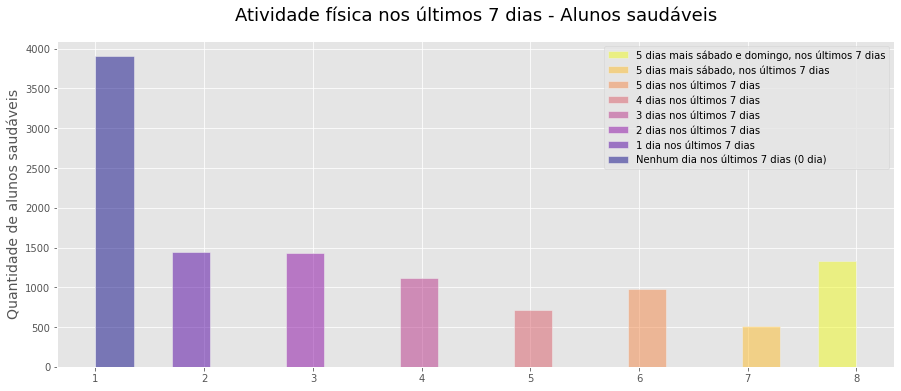

In [ ]:
### Exploração gráfica sobre a variável atividade física na semana.
variável = ('Nenhum dia nos últimos 7 dias (0 dia)', '1 dia nos últimos 7 dias','2 dias nos últimos 7 dias','3 dias nos últimos 7 dias','4 dias nos últimos 7 dias','5 dias nos últimos 7 dias','5 dias mais sábado, nos últimos 7 dias','5 dias mais sábado e domingo, nos últimos 7 dias')

plt.figure(figsize=(15,6))
plt.title("Atividade física nos últimos 7 dias - Alunos saudáveis", fontsize= 18, pad=20)
ax = sns.histplot(data = dados_saudáveis,
                  x = 'VB03006A',
                  hue='VB03006A',
                  legend=True,
                  palette='plasma')

ax.set_ylabel('Quantidade de alunos saudáveis', fontsize=14)
ax.set_xlabel('', fontsize=14)
ax.legend(variável[::-1],loc='upper right')
ax.grid(True)
ax = ax

A variável VB02022 questiona: NOS ÚLTIMOS 7 DIAS, em quantos dias você comeu alimentos industrializados/ultraprocessados salgados, como hambúrguer, presunto, mortadela, salame, linguiça, salsicha, macarrão instantâneo, salgadinho de pacote, biscoitos salgados? (Quanto maior o número da resposta, maior a quantidade de dias ingerindo esses produtos, sendo 1 = nenhum dia, 2 = 1 dia; seguindo até chegar a  8 = 7 dias. 

No grupo dos obesos, a maioria não come com frequência esse tipo de produto. O que pode gerar resultados positivos a longo prazo. No entanto, no grupo dos saudáveis, a resposta 8 (Todos os dias dos últimos 7 dias) é a que aparece com maior frequência. Considerando as respostas dos alunos como absoluta verdade, é um dado preoucupante. 

In [ ]:
### Exclusão de valores 99, que indica "não informado". São valores pequenos em relação ao total e dispersam a apresentação do gráfico.
dados_obeso2 = dados.query('VB17006 == 4 & VB02022 < 9')
dados_saudaveis = dados.query('VB17006 == 2')
dados_saudaveis2 = dados.query('VB17006 == 2 & VB02022 < 9')

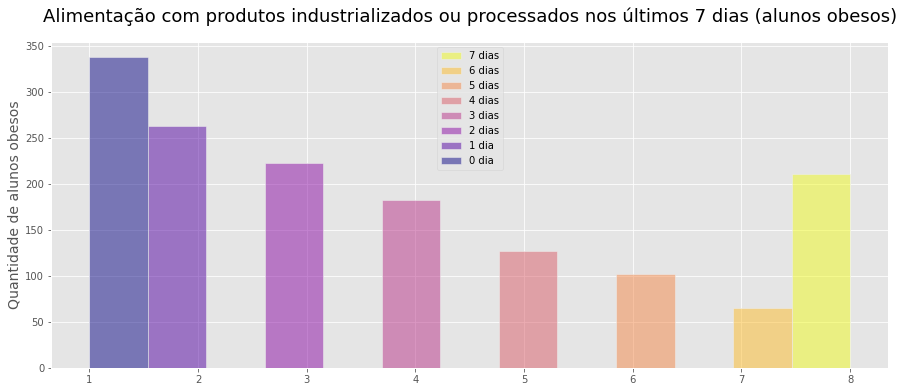

In [ ]:
### Exploração gráfica sobre a variável alimentação.
variável = ('0 dia', '1 dia','2 dias','3 dias','4 dias','5 dias','6 dias','7 dias')
plt.figure(figsize=(15,6))
plt.title("Alimentação com produtos industrializados ou processados nos últimos 7 dias (alunos obesos)", fontsize= 18, pad=20)
ax = sns.histplot(data = dados_obeso2,
                  x = 'VB02022',
                  hue='VB02022',
                  legend=True,
                  palette='plasma')

ax.set_ylabel('Quantidade de alunos obesos', fontsize=14)
ax.set_xlabel('', fontsize=14)
ax.legend(variável[::-1],loc='upper center')
ax.grid(True)
ax = ax

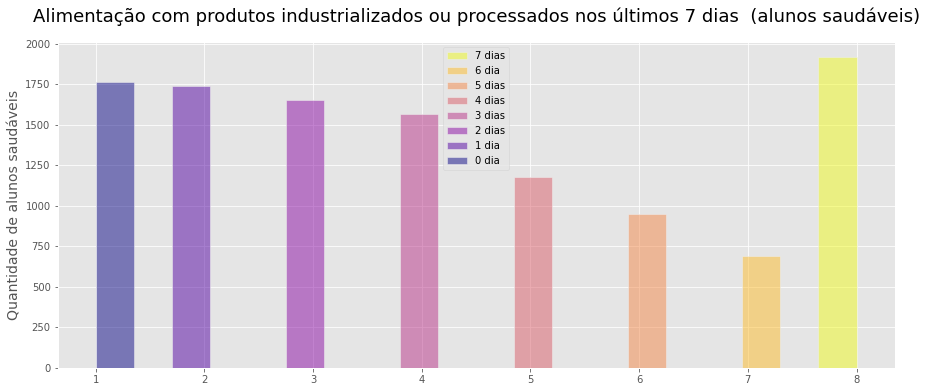

In [ ]:
### Exploração gráfica sobre a variável alimentação.
dados_saudáveis2 = dados.query('VB17006 == "2" & VB02022 < 9')
variável = ('0 dia', '1 dia','2 dias','3 dias','4 dias','5 dias','6 dia','7 dias')
plt.figure(figsize=(15,6))
plt.title("Alimentação com produtos industrializados ou processados nos últimos 7 dias  (alunos saudáveis)", fontsize= 18, pad=20)
ax = sns.histplot(data = dados_saudáveis2,
                  x = 'VB02022',
                  hue='VB02022',
                  legend=True,
                  palette='plasma')

ax.set_ylabel('Quantidade de alunos saudáveis', fontsize=14)
ax.set_xlabel('', fontsize=14)
ax.legend(variável[::-1],loc='upper center')
ax.grid(True)
ax = ax

##5. Hipótese estatística sobre obesidade

Praticar atividade física (VB03006A), segundo as respostas dos alunos no questionário, tem influenciado na questão da obesidade? Comparando os dois grupos (saudáveis e obesos), existe signicativa diferença comportamental entre eles? Quem pratica mais atividade fisica é mais propicio a ser saudável segundo os dois grupos? Na teoria sim, porém, a análise gráfica não confirmou isso. A média dos dias de atividades fisica dos obesos está sutilmente maior que a dos alunos saudáveis.

Problema:

Duas amostras aleatórias, uma de 500 saudáveis e outra com 500 obesos, foram selecionadas em nosso dataset. Com o objetivo de comprovar tal desigualdade, será testada a igualdade das médias entre estas duas amostras com um nível de significância de 5%.

Neste tipo de teste (teste para duas amostras)se deseja decidir se uma amostra é diferente da outra.

In [ ]:
### Seleção das amostras
saudáveis = dados.query('VB17006 == 2 & VB03006A < 9').sample(n = 500, random_state = 101).VB03006A
obesos = dados.query('VB17006 == 4 & VB03006A < 9').sample(n = 500, random_state = 101).VB03006A

In [ ]:
media_amostra_saudáveis = saudáveis.mean()
media_amostra_saudáveis

3.466

In [ ]:
desvio_padrao_amostra_saudáveis = saudáveis.std()
desvio_padrao_amostra_saudáveis

2.492643283962264

In [ ]:
media_amostra_obesos = obesos.mean()
media_amostra_obesos

3.634

In [ ]:
desvio_padrao_amostra_obesos = obesos.std()
desvio_padrao_amostra_obesos

2.425656946735571

In [ ]:
significancia = 0.05
confianca = 1 - significancia
n_saudáveis = 500
n_obesos = 500
D_0 = 0

### - Formulação das hipóteses $H_0$ e $H_1$


### $\mu_1 \Rightarrow$ Média dos dias de atividades fisica (na semana) dos alunos obesos
### $\mu_2 \Rightarrow$ Média dos dias de atividades fisica (na semana) dos alunos saudáveis 

### $
\begin{cases}
H_0: \mu_1 -\mu_2 \leq 0\\
H_1: \mu_1 -\mu_2 > 0
\end{cases}
$

Como hipótese nula temos que os obesos praticam menos atividades fisica que os saudáveis.  

### - Escolha da distribuição amostral adequada
<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img003.png' width=70%>


A amostra é maior que 30, e o desvio padrão populacional não é conhecido. 

### - Fixação da significância do teste ($\alpha$)

In [ ]:
probabilidade = significancia
probabilidade

0.05

In [ ]:
z_alpha = norm.ppf(probabilidade)
z_alpha.round(2)

-1.64

### - Cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

# $$z = \frac{(\bar{x_1} - \bar{x_2})-D_0}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$$

In [ ]:
numerador = (media_amostra_obesos - media_amostra_saudáveis) - D_0

denominador = np.sqrt((desvio_padrao_amostra_obesos ** 2 / n_obesos) + (desvio_padrao_amostra_saudáveis ** 2 / n_saudáveis))

z = numerador / denominador

z

1.080075136546634

###  - Aceitação ou rejeição da hipótese nula

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img014.png' width=90%>

### <font color='red'>Critério do valor crítico</font>

> ### Teste Unicaudal
> ### Rejeitar $H_0$ se $z \geq z_{\alpha}$

In [ ]:
z >= z_alpha

True

### <font color='green'>Conclusão: Com um nível de confiança de 95% rejeita-se $H_0$, isto é, concluí-se que a média dos dias de atividade física dos alunos obesos é maior que a média dos dias de atividade física dos saudáveis.</font>

##6. Conclusão

 - A grande maioria dos entrevistados são brancos ou 
pardos: 80,3% dos alunos.  

- Ainda são maioria os alunos dentro do peso: 69.3%. No entanto, obesos e alunos com sobrepeso representam quase 30%. A obesidade no Brasil, segundo o IBGE/2016 é de 6,7%. Entre os alunos do PeNSE/2015 está em quase 10%.  


- Sul e sudeste lideram o número de obesos. 

- O sexo masculino tem mais obesos (56%) que o sexo feminino (44%). 

- Em geral, os alunos mais novos (entre 11 e 16 anos) são maioria na pesquisa. Compreendem um universo de 85% dos entrevistados. 

- 52% dos obesos são de 13 anos ou menos. 

- Somente na raça Indigena o número de obesos do sexo feminino sobrepõe aos obesos do sexo masculino. 


- Em relação as escolas públicas e particulares, 70% dos alunos obesos estudam em escolas públicas. Se alimentar mal não é sinônimo de perda de peso. Comer muito é indicativo de ganho de peso. Comer pouco ou não ter alimento é indicativo de perda de peso. 

- Não se pode correlacionar somente atividade física com obesidade. Diversos fatores contribuem para a obesidade, como outras doenças, depressão, alimentação fora de hora, entre outros. Um dos fatores que talvez justifiquem a incoerência dos resultados sobre a variável atividade fisica, seja a veracidade das respostas dadas pelos alunos. Pode-se confiar 100% nas respostas de crianças e adolescentes? Existe uma orientação e norteamento sobre a pesquisa e a importância dela? O governo faz programas de conscientização ou somente aplica o questionário?


- Existe um mundo de variáveis a serem exploradas no arquivo. Escolhi um tema, obesidade, mas uma pesquisa dessa dimensão pode gerar um enorme número de trabalhos e pesquisas. 
